## Setup

Para reproduzir os código de exemplo desse notebook assume-se Python versão 3.6 e é necessária a instalação das seguintes bibliotecas:

```
pip3 install scipy matplotlib
pip3 install numpy
```

# SciPy

![alt text](https://raw.githubusercontent.com/donnemartin/data-science-ipython-notebooks/master/images/scipy.png)

O [Scipy](http://www.scipy.org/) é uma biblioteca que contém módulos para otimização, álgebra linear, integração, interpolação, funções especiais, FFT, processamento de sinais e imagens, solucionadores de EDO's e outras tarefas comuns em ciência e engenharia.
É a biblioteca base utilizada para o desenvolvimento da famosa Scikit-Learn.

Fornece ferramentas eficientes para processamento dos dados (usando o [numpy](https://numpy.org/)) nas aplicações científicas mais comuns.

In [0]:
# Setup
import numpy as np

np.random.seed(42)

def ruido(size):
    return np.random.normal(size=size)

Como forma de motivação e exemplificação de aplicações, serão apresentados os métodos de Otimização, Estatística e Manipulação de imagens.

## Otimização

Um dos métodos básicos do SciPy é a [Otimização](https://docs.scipy.org/doc/scipy/reference/optimize.html), que fornece funções para minimizar (ou maximizar) funções objetivas. Inclui solucionadores para problemas não lineares (com suporte para algoritmos de otimização locais e globais), programação linear, mínimos quadrados não-lineares e restritos, localização de raiz e ajuste de curva (curve fitting).



Uma das possibilidades é a [otimização](https://docs.scipy.org/doc/scipy/reference/optimize.html) de valores para aproximação de funções:

Amplitude real / estimada: 3.00 / 2.81
Frequência real / estimada: 1.50 / 1.50


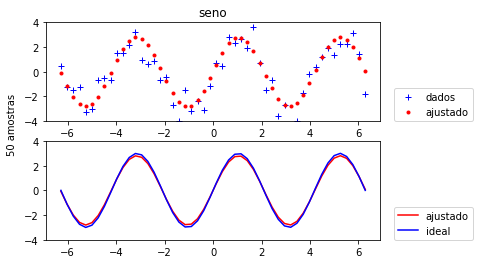

In [0]:
%matplotlib inline
from matplotlib import pyplot as plt
from scipy import optimize


def seno(x, amplitude, frequencia):
    return amplitude * np.sin(frequencia * x)


amplitude, frequencia = 3, 1.5
amostras = 50

x = np.linspace(-2 * np.pi, 2 * np.pi, num=amostras)
# "dados reais" geralmente têm ruído
y = seno(x, amplitude, frequencia) + ruido(amostras)    

params, covariance = optimize.curve_fit(seno, x, y)

print(f'Amplitude real / estimada: {amplitude:.2f} / {params[0]:.2f}')
print(f'Frequência real / estimada: {frequencia:.2f} / {params[1]:.2f}')

# Visualmente
plt.subplot(2, 1, 1)
plt.ylim(-4, 4)
plt.plot(x, y, 'b+', linestyle='', label='dados')
plt.plot(x, seno(x, *params), 'r.', label='ajustado')
plt.legend(loc=(1.04,0))
plt.title(f'seno')

plt.subplot(2, 1, 2)
plt.ylim(-4, 4)
plt.plot(x, seno(x, *params), 'r', label='ajustado')
plt.plot(x, seno(x, amplitude, frequencia), 'b', label='ideal')
plt.legend(loc=(1.04,0))
plt.text(-8.5, 3, f'{amostras} amostras', rotation='vertical')

plt.show()

## Estatística

Outro importante método é o [Stats](https://docs.scipy.org/doc/scipy/reference/stats.html) que contém um vasto número de ferramentas estatísticas e funções para realização de distribuições probabilísticas.

Através desse método, é possível verificar a distribuição *t*  de Student de um conjunto de dados e, aliado à biblioteca NumPy, construir representações gráficas que permitem uma análise profunda, como exemplificado abaixo.


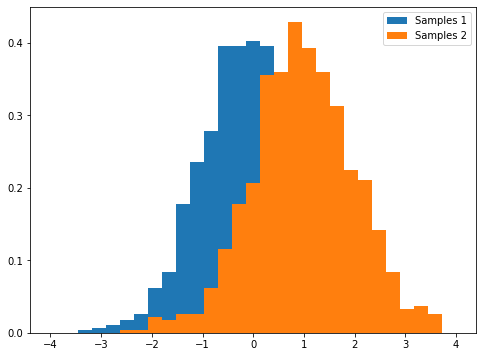

In [0]:
import numpy as np
from matplotlib import pyplot as plt

# Cria 2 conjuntos de observações
samples1 = np.random.normal(0, size=1000)
samples2 = np.random.normal(1, size=1000)

# Calcula o histograma da amostra
bins = np.linspace(-4, 4, 30)
histogram1, bins = np.histogram(samples1, bins=bins, density=True)
histogram2, bins = np.histogram(samples2, bins=bins, density=True)

plt.figure(figsize=(8, 6))
plt.hist(samples1, bins=bins, density=True, label="Samples 1")
plt.hist(samples2, bins=bins, density=True, label="Samples 2")
plt.legend(loc='best')
plt.show()

Agora, com o método Stats, pode-se realizar o [teste *t* de Student](https://pt.wikipedia.org/wiki/Teste_t_de_Student).

Resumidamente, o resultado apresentado é composto por:


*   statistic: Valor T. Determinado a partir da comparação das médias amostrais com a hipótese nula e incorporam o tamanho amostral e a variabilidade nos dados. Um valor-t de 0 indica que os resultados da amostra são exatamente iguais à hipótese nula. Conforme aumenta a diferença entre os dados amostrais e a hipótese nula, o valor absoluto do valor-t aumenta.
*   pvalue: Valor P.  É a probabilidade de se obter uma estatística de teste igual ou mais extrema que aquela observada em uma amostra, sob a hipótese nula.



In [0]:
from scipy import stats
stats.ttest_ind(samples1, samples2)   


Ttest_indResult(statistic=-23.33837803582114, pvalue=9.859665975428132e-107)

Para uma análise mais profunda, é necessário um estudo específico da Estatística em si, que é muito importante para qualquer aplicação de Machine Learning. Posteriormente, será abordado novamente tais definições. 

## Manipulação de imagens

Outra aplicação da SciPy está na [manipulação de imagens](https://scipy-lectures.org/advanced/image_processing/index.html), possibilitando realizar pequenas transformações e, até mesmo, aplicação de filtros às imagens, como apresentado abaixo.

Foi utilizado o [código](https://scipy-lectures.org/advanced/image_processing/auto_examples/plot_geom_face.html) disponibilizado pela biblioteca como referência.


Plot da imagem original em preto e branco.

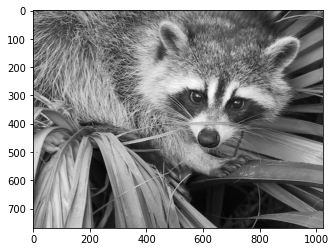

In [0]:
# Load some data
from scipy import misc
face = misc.face(gray=True)

plt.imshow(face,cmap=plt.cm.gray)

Aplicação de algumas transformações:

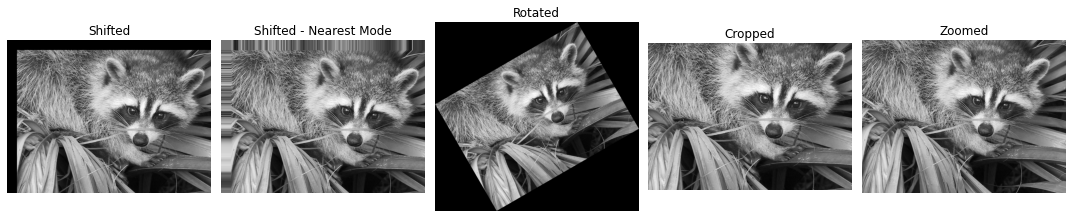

In [0]:
from scipy import ndimage
from matplotlib import pyplot as plt

# Move a imagem para uma certa posição
shifted_face = ndimage.shift(face, (50, 50))

# Move a imagem e completa o espaço vazio com a mesma informação que a borda da imagem.
shifted_face2 = ndimage.shift(face, (50, 50), mode='nearest')

# Rotaciona a imagem
rotated_face = ndimage.rotate(face, 30)

# Corta a imagem
cropped_face = face[50:-50, 50:-50]

# Zoom
zoomed_face = ndimage.zoom(face, 2)
zoomed_face.shape

plt.figure(figsize=(15, 3))
plt.subplot(151)
plt.imshow(shifted_face, cmap=plt.cm.gray)
plt.axis('off')
plt.title('Shifted')

plt.subplot(152)
plt.imshow(shifted_face2, cmap=plt.cm.gray)
plt.axis('off')
plt.title('Shifted - Nearest Mode')

plt.subplot(153)
plt.imshow(rotated_face, cmap=plt.cm.gray)
plt.axis('off')
plt.title('Rotated')

plt.subplot(154)
plt.imshow(cropped_face, cmap=plt.cm.gray)
plt.axis('off')
plt.title('Cropped')

plt.subplot(155)
plt.imshow(zoomed_face, cmap=plt.cm.gray)
plt.axis('off')
plt.title('Zoomed')

plt.subplots_adjust(wspace=.05, left=.01, bottom=.01, right=.99, top=.99)

plt.show()

Aplicação de filtros:

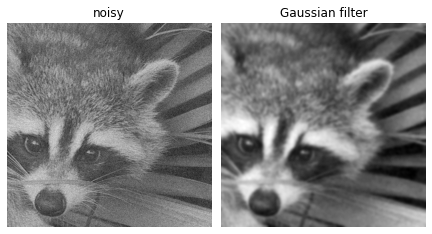

In [0]:
from scipy import misc
face = misc.face(gray=True)
zoomed_face = face[:512, -512:]  # corta um quadrado na direita

# Aplica uma variedade de filtros
from scipy import ndimage
from scipy import signal
from matplotlib import pyplot as plt

import numpy as np
noisy_face = np.copy(zoomed_face).astype(np.float)
noisy_face += zoomed_face.std() * 0.5 * np.random.standard_normal(zoomed_face.shape)
blurred_face = ndimage.gaussian_filter(noisy_face, sigma=3)

plt.figure(figsize=(12, 3.5))
plt.subplot(141)
plt.imshow(noisy_face, cmap=plt.cm.gray)
plt.axis('off')
plt.title('noisy')

plt.subplot(142)
plt.imshow(blurred_face, cmap=plt.cm.gray)
plt.axis('off')
plt.title('Gaussian filter')


plt.subplots_adjust(wspace=.05, left=.01, bottom=.01, right=.99, top=.99)

plt.show()

## Outros Recursos

* [Machine Learning in Python](https://www.springboard.com/resources/learning-paths/machine-learning-python/)
*   [SciPy Library](https://scipy-lectures.org/index.html)
*   [Student T Distribution](https://www.sciencedirect.com/topics/mathematics/student-t-distribution)

